In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating dataset for classification problem

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#creating a dadaframe using the data X and y
df = pd.DataFrame(data={"X0" : X[ :, 0], "X1" : X[ :, 1], "labels" : y})
df

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


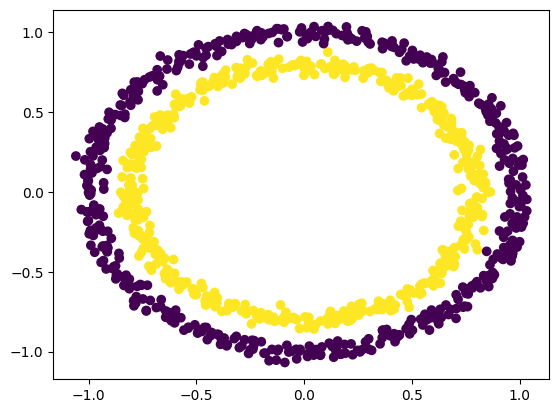

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Input and Outpit Shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

Model1

In [7]:
tf.random.set_seed(42)

In [8]:
model_1 = tf.keras.Sequential(
  [tf.keras.layers.Dense(2),
   tf.keras.layers.Dense(100),
   tf.keras.layers.Dense(1)])

In [9]:
model_1.compile(loss=tf.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics="accuracy")

In [10]:
model_1.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.2030 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5050
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4970
Epoch 11/

Improving the model

In [11]:
tf.random.set_seed(42)

In [19]:
model_2 = tf.keras.Sequential(
  [tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)])

In [21]:
model_2.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics='accuracy')

In [22]:
model_2.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5000
Epoch 11/

In [23]:
model_2.predict([[0.5, 0.5]])

1/1 [==============================] - 0s 67ms/step


array([[0.5944232]], dtype=float32)

In [24]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


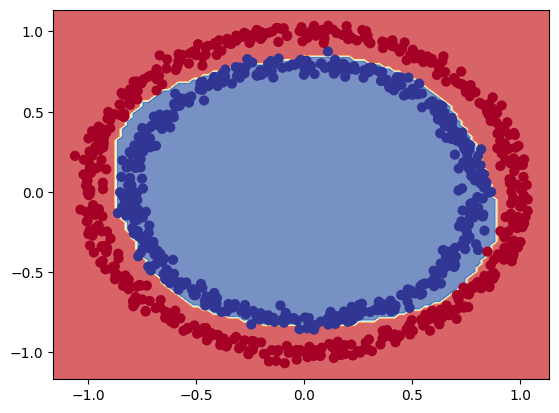

In [25]:
plot_decision_boundary(model_2, X, y)